# Linear Regression Refresher

Optimize the orientation of a line that best fits coupled/correlated parameters.

- Simple Linear Regression: Uses 1 dependent (y) variable and 1 independent (x) variable.

- Formula: y = m * x + b
- Goal: Optimize the slop (m) and y-intercept (b)

## Example

Housing prices across the United States

- **First, I need to import the Library**

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

- **Then I read the data from csv file**

In [2]:
df = pd.read_csv('usa_housing.csv')

In [3]:
# conda install posix 

! head -2 usa_housing.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


- **I will remane the headers since they are long**

In [4]:
housing = pd.read_csv('usa_housing.csv', header=1, 
                      names=['income', 'age', 'rooms', 'bedrooms', 'population', 'price', 'address'])
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


## Observables (Feature)

- Features (X): These are the independent variables used as input for the model.
  - **income, age, rooms, bedrooms, population**
- Target Observable (y): The dependent variable that the model is trying to predict
  - **price**

In [5]:
feature_list = ['income', 'age', 'rooms', 'bedrooms', 'population']

### Visualize the data

Plot the features versus price (X vs y) to see the ralationship.

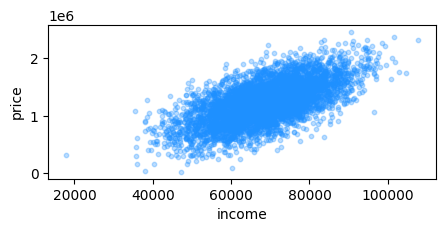

In [6]:
fig = plt.figure(figsize=(11, 8))

fig.subplots_adjust(wspace=0.2, hspace=0.5)

for count, feature in enumerate(feature_list):
    ax = fig.add_subplot(3, 2, count+1) # first position cannot be zero

    ax.set_xlabel(xlabel=feature)
    ax.set_ylabel(ylabel='price')

    ax.scatter(housing[feature], housing['price'], color='dodgerblue', s=10, alpha=0.3)

    plt.show()

# Linear Regression on a Single Feature (one-dimensional)

- Input (X): A single column (Area number of rooms)
- Output (y): The single target variable (Price)

**Linear model that finds a best-fit line: y = m * x + b, where x is the number of rooms**

In [7]:
feature = housing['rooms'].values
target = housing['price'].values

## Training and Testing

Using scikit-learn function:

- train_test_split(*arrays, test_size=None, train_size=None, random_state=None, suffle=True, stratify=None)

- Primary Arguments:
    - test_size
    - train_size
    - random_state
      
- Returns:
    - Xtrain (Features for Training)
    - Xtest (Features for Testing)
    - ytrain (Target for Training)
    - ytest (Target for Testing)
      
- Type: returns **a list of numpy.ndarrays**

  
- Documentaion: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target,
                                                                          test_size=0.25, train_size=0.75,
                                                                          random_state=1)

We should have 25% of the data being researved for the future testing.

In [9]:
print(f'Type of the training features: {type(feature_train)}')
print(f'Leangth of the training data: {len(target_train)}')
print(f'Leangth of the test data: {len(target_test)}')

print(f'Fraction of data used for the test data set: '
      f' {len(target_test) / (len(target_train) + len(target_test)) :0.2f}')

Type of the training features: <class 'numpy.ndarray'>
Leangth of the training data: 3749
Leangth of the test data: 1250
Fraction of data used for the test data set:  0.25


### Visualize the training and test data

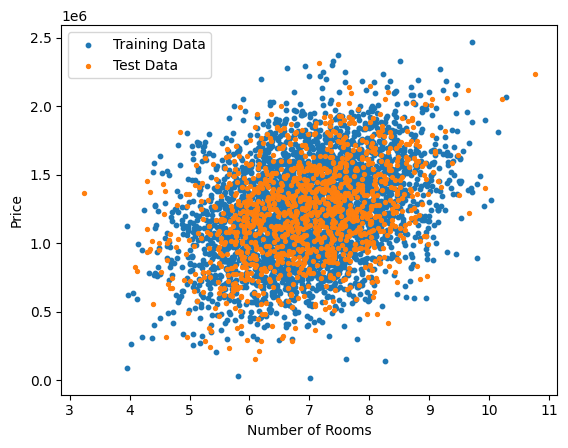

In [10]:
plt.figure()

plt.scatter(feature_train, target_train, s=10, label='Training Data')
plt.scatter(feature_test, target_test, s=8, label='Test Data')

plt.xlabel(xlabel='Number of Rooms')
plt.ylabel(ylabel='Price')

plt.legend(loc='best')

plt.show()

### Reshape the data

scikit-learn's LinearRegresion requires the data to have a certain Numpy array shape (a 2-dimensional structure, even using only one feature).

- **Already Done**: the target_train and target_test arrays already have the correct shape.
- **Need to Do**: reshape fature_train and feature_test, because it is a single feature.
    - reshape array from (n_samples,) to (n_samples, 1).

**Feature Train:**

In [11]:
display(feature_train)
display(feature_train.shape)

array([7.76350224, 6.67325638, 6.39398078, ..., 6.11019169, 7.04733826,
       5.35511362], shape=(3749,))

(3749,)

**Feature Test:**

In [12]:
display(feature_test)
display(feature_test.shape)

array([6.57676266, 7.47055751, 7.09271404, ..., 7.33598472, 5.96123976,
       7.05452948], shape=(1250,))

(1250,)

### Reshape the Features

- The -1 trick

    - One shape dimension can be set to -1.
    - When -1 is used, NumPy automatically calculates the necessary dimension based on the array's total size.

In [13]:
feature_train = np.reshape(feature_train, (-1, 1))
features_test = np.reshape(feature_test, (-1, 1))

display(feature_train)
display(feature_train.shape)

array([[7.76350224],
       [6.67325638],
       [6.39398078],
       ...,
       [6.11019169],
       [7.04733826],
       [5.35511362]], shape=(3749, 1))

(3749, 1)

# Least Squares Linear Regression

We will **train** the model in **two steps**
1. Define the callable model
2. Train the Model

**Define our model**

In [14]:
reg = LinearRegression(fit_intercept=True)

**Train our model**

In [15]:
model = reg.fit(X=feature_train, y=target_train)

### Making Predictions using Your Model

- Method: model.predict(X)
    - Arguments: Requires a 2D numpy.ndarray of features (Xnew)
    - Return: the predicted target values (Y hat new)

**Create a New/Independent/Unknown House**

- **Know Feature (X new): 5 rooms**
    - This input must also be reshaped into the 2D format: array([[5]]) before passed to predict.
- **Predict Target (Y hat new): Predicted Price**

In [16]:
new_house_feature = np.array([ [5] ])

display(new_house_feature)
display(new_house_feature.shape)

array([[5]])

(1, 1)

In [17]:
model.predict(X=new_house_feature)

array([1001101.21587117])

**Predictions for Multiple Houses**

To predict the prices for multiple house (5 rooms and 2 rooms), we combine the inputs into a single 2D NumPy array.

In [18]:
new_houses_feature = np.array([ [5], [2] ])
display(new_house_feature)
display(new_houses_feature.shape)

model.predict(X=new_houses_feature)

array([[5]])

(2, 1)

array([1001101.21587117,  648896.73256613])

In [19]:
print(f'''Thus, the houses with 5 and 2 rooms are predicted to cost ca.
      $ {model.predict(X=new_houses_feature)[0]:0.1e} and
      $ {model.predict(X=new_houses_feature)[1]:0.1e}, respectively.''')

Thus, the houses with 5 and 2 rooms are predicted to cost ca.
      $ 1.0e+06 and
      $ 6.5e+05, respectively.


### Evaluate the fit using the Coefficient of Determination (R^2) - goodness of fit

R^2 is a key metric for evaluating Regression models.

Two ways to compute R^2
1. score(X, y, sample_weight=None)
2. r2_score
    - Requiring true (y) and predicted (y hat) values as input.

- Score = 1: Best possible model.
- Score = 0: Poor model.
- Score < 0: Wrong model.

**Using the housing test data set**

In [20]:
display(features_test.shape)

predict = model.predict(X=features_test)
predict

(1250, 1)

array([1186215.50861122, 1291148.35942672, 1246788.97167495, ...,
       1275349.31239641, 1113952.20006345, 1242306.04755028],
      shape=(1250,))

**score**

In [21]:
model.score(X=features_test, y=target_test, sample_weight=None)

0.1173486982720563

**r2_score**

In [22]:
r2_score(y_true=target_test, y_pred=predict, multioutput='uniform_average', sample_weight=None, force_finite=True) 

0.1173486982720563

### Overlay the scattered data with the model's prediction

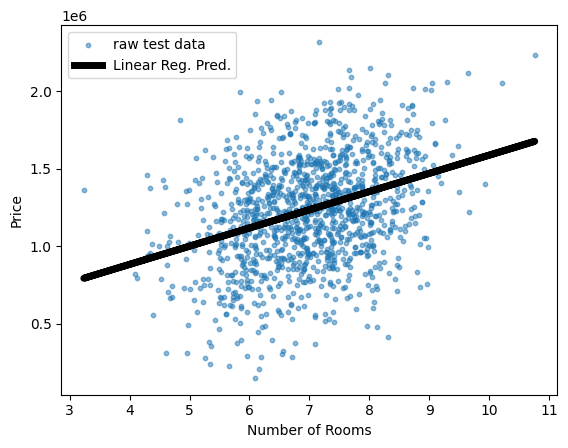

In [23]:
plt.figure()

plt.scatter(features_test, target_test, s=10, alpha=0.5, label='raw test data')
plt.plot(features_test, predict, color='black', linewidth=5, linestyle='solid', label='Linear Reg. Pred.')

plt.xlabel(xlabel='Number of Rooms')
plt.ylabel(ylabel='Price')

plt.legend(loc='best')

plt.show()

In [24]:
print(f'Coefficients: {model.coef_}')
print(f'y-intercept: {model.intercept_}\n')

print(f'''Linear regression line:
      y(x) = price(room) = {model.coef_[0]:0.2e}x + {model.intercept_:0.2e}''')

Coefficients: [117401.49443501]
y-intercept: 414093.74369610124

Linear regression line:
      y(x) = price(room) = 1.17e+05x + 4.14e+05


### Proof of concept

- Using the line equation, our optimized coefficients and y-intercept, we can predict the price.

First, recall from above that this was done using the predict function:

In [25]:
model.predict(X=np.array([ [5] ]))

array([1001101.21587117])

Now using an optimized straight line equation:

In [26]:
price = (model.coef_[0] * 5) + model.intercept_
f'{price}'

'1001101.2158711696'

# Create a Model from Two Features

The equation that defines a line has two "features" (2 independent variables) is
- y = m1 * x1 + m2 * x2 + b

    - x1 and x2 = data for the two features
    - m1 and m2 = the coeffients
    - b = y-intercept                                  

=> This concept can be extended to **n features**

In [27]:
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [28]:
two_features = ['age', 'rooms']

display(two_features)
display(housing[two_features].shape)

['age', 'rooms']

(4999, 2)

=> If there are more than **1 features**, we can pass the DataFrame directly to **train_test_split** without reshaping them.

In [29]:
features_train, features_test, target_train, target_test = train_test_split(housing[two_features], target,
                                                                            test_size=0.25, train_size=0.75,
                                                                            random_state=1)
features_train

,age,rooms
3092,5.347527,7.763502
632,6.371179,6.673256
577,5.241163,6.393981
4133,5.739553,7.013864
2625,6.165033,7.085072
...,...,...
2895,7.181744,4.419215
2763,6.742828,6.604335
905,6.010154,6.110192
3980,4.069650,7.047338


### Model Training

In [30]:
reg = LinearRegression(fit_intercept=True)

In [31]:
model = reg.fit(X=features_train, y=target_train)

### Model Evaluate

In [32]:
model.score(X=features_test, y=target_test)

0.3118247657615971

### Make Predictions

In [33]:
predict = model.predict(X=features_test)
predict

array([1353188.28612759, 1527233.54154822, 1563438.45256345, ...,
       1388865.46294633,  705620.78631846, 1231882.19625501],
      shape=(1250,))

**Create a plot function to visualize price vs features**

In [34]:
def plot_features(feature_list: list,
                  target: np.ndarray,
                  feature_df: pd.DataFrame,
                  predict: np.ndarray=None):
    ''' Create a plot with multiple subplots displayed in two columns.

        Args
            feature_list: y-axis features to be extracted from feature_df (i.e. column names)
            target: x-axis data
            feature_df: y-axis data
            predict: predicted values based on machine learning
        Returns
            plot

        Library dependencies
            matplotlib
            numpy
            pandas
    '''
    if not isinstance(feature_list, list):
        raise TypeError('Input features are not given as a list.')
    elif not isinstance(target, np.ndarray):
        raise TypeError('Target values are not given as a NumPy array.')
    elif not isinstance(feature_df, pd.DataFrame):
        raise TypeError('feature_df is not given as a Pandas dataframe.')
    elif not isinstance(predict, np.ndarray):
        raise TypeError('predict is not given as a NumPy array.')
    else:

        number_of_rows = int(np.ceil(len(feature_list)/2))  # number of rows for a 2 column plot

        fig = plt.figure(figsize=(11, 3*number_of_rows))    # same height subplots regardless of rows

        fig.subplots_adjust(wspace=0.2, hspace=0.5)

        for count, feature in enumerate(feature_list):
            ax = fig.add_subplot(number_of_rows, 2, count+1)  # first position can not be zero

            ax.set_xlabel(xlabel=feature)
            ax.set_ylabel(ylabel='price')

            ax.scatter(feature_df[feature], target, color='dodgerblue', s=20, alpha=0.3, label='known')

            if predict is not None:
                ax.scatter(feature_df[feature], predict, color='orange', s=10, alpha=0.5, linestyle='solid', label='prediction')

            ax.legend(loc='best')

        plt.show()

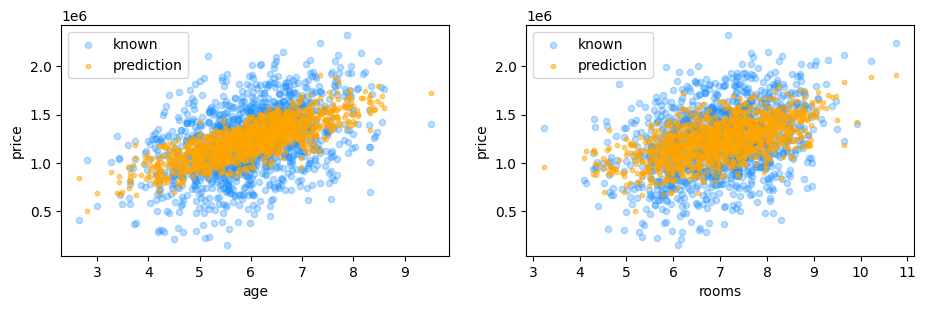

In [35]:
plot_features(feature_list=two_features, feature_df=features_test, target=target_test, predict=predict)

### What would the resulting two-feature linear equation look like?

y = (m1 * x1) + (m2 * x2) + (b)

In [36]:
print(f'Coefficients: {model.coef_}')
print()
print(f'y-intercept: {model.intercept_}')

Coefficients: [163659.78370564 117927.87267283]

y-intercept: -567872.2616741166


In [37]:
print(f'y = ({model.coef_[0]:0.2e} * x) \n'\
      f'  + ({model.coef_[1]:0.2e} * x) \n'\
      f'  + {model.intercept_:0.2e}')

y = (1.64e+05 * x) 
  + (1.18e+05 * x) 
  + -5.68e+05


### Apply it to an individual house (first data entry)

**Using Pandas loc[[]] to isolate a row:**

In [39]:
housing.loc[[0]]

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.0029,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


**Recall that we can use Pandas loc[[ , ]] to isolate rows and columns:**

In [41]:
display(housing.loc[[0], ['age', 'rooms', 'price']])

,age,rooms,price
0,6.0029,6.730821,1.505891e+06


**Using our ML model:**

In [42]:
price = model.predict(X=housing.loc[[0], ['age', 'rooms']])

f'{price[0]:0.2e}'

'1.21e+06'

**Alternatively, using the equation for a line**

y = (m1 * x1) + (m2 * x2) + (b)

In [43]:
print(f'y = ({model.coef_[0]:0.2e} * {float(housing["age"].iloc[0]):0.2e})'\
      f' + ({model.coef_[1]:0.2e} * {float(housing["rooms"].iloc[0]):0.2e})'\
      f' + {model.intercept_:0.2e}')

y = (1.64e+05 * 6.00e+00) + (1.18e+05 * 6.73e+00) + -5.68e+05


In [44]:
predicted_price = (model.coef_[0] * float(housing["age"].iloc[0]))     \
                + (model.coef_[1] * float(housing["rooms"].iloc[0]))        \
                + model.intercept_

f'{predicted_price:0.2e}'

'1.21e+06'

In [45]:
actual_price = housing["price"].iloc[0]

print(f'The listed price in the dataset is: {actual_price:0.2e}, '\
      f'a difference of {actual_price-predicted_price:0.2e}.')

The listed price in the dataset is: 1.51e+06, a difference of 2.98e+05.


**Sidenote: Plot the line corresphonding to each subfeature**

1. Create a straight line for plotting
2. Scatter plot the data and overlay with the straight lines
3. Do this in a loop that cycles over the features          

Features:

In [46]:
two_features

['age', 'rooms']

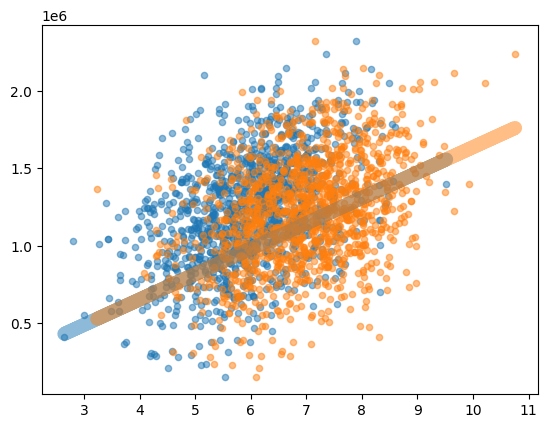

In [47]:
plt.figure()

for observable in two_features:
    observable_line = (model.coef_[0] * features_test[observable])

    plt.scatter(features_test[observable], target_test, s=20, alpha=0.5)
    plt.plot(features_test[observable], observable_line, linewidth=10, alpha=0.5, linestyle='solid')

# Model from five features

In [48]:
five_features = ['income', 'age', 'rooms', 'bedrooms', 'population']

display(housing[five_features])
display(housing[five_features].shape)

,income,age,rooms,bedrooms,population
0,79248.642455,6.002900,6.730821,3.09,40173.072174
1,61287.067179,5.865890,8.512727,5.13,36882.159400
2,63345.240046,7.188236,5.586729,3.26,34310.242831
3,59982.197226,5.040555,7.839388,4.23,26354.109472
4,80175.754159,4.988408,6.104512,4.04,26748.428425
...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035
4995,78491.275435,6.999135,6.576763,4.02,25616.115489
4996,63390.686886,7.250591,4.805081,2.13,33266.145490
4997,68001.331235,5.534388,7.130144,5.44,42625.620156


(4999, 5)

In [49]:
features_train, features_test, target_train, target_test = train_test_split(housing[five_features], target,
                                                                            test_size=0.25, train_size=0.75,
                                                                            random_state=1)

In [50]:
model = reg.fit(X=features_train, y=target_train)

model.score(X=features_test, y=target_test)

0.9187244501899444

In [51]:
predict = model.predict(X=features_test)
predict

array([1406603.0061247 , 1614010.33868918, 1450190.49885833, ...,
       1208628.34023583,  476142.09777601,  909865.6557775 ],
      shape=(1250,))

**Let's visualize how well the ML'ed predicted values in comparison to the original test input data:**

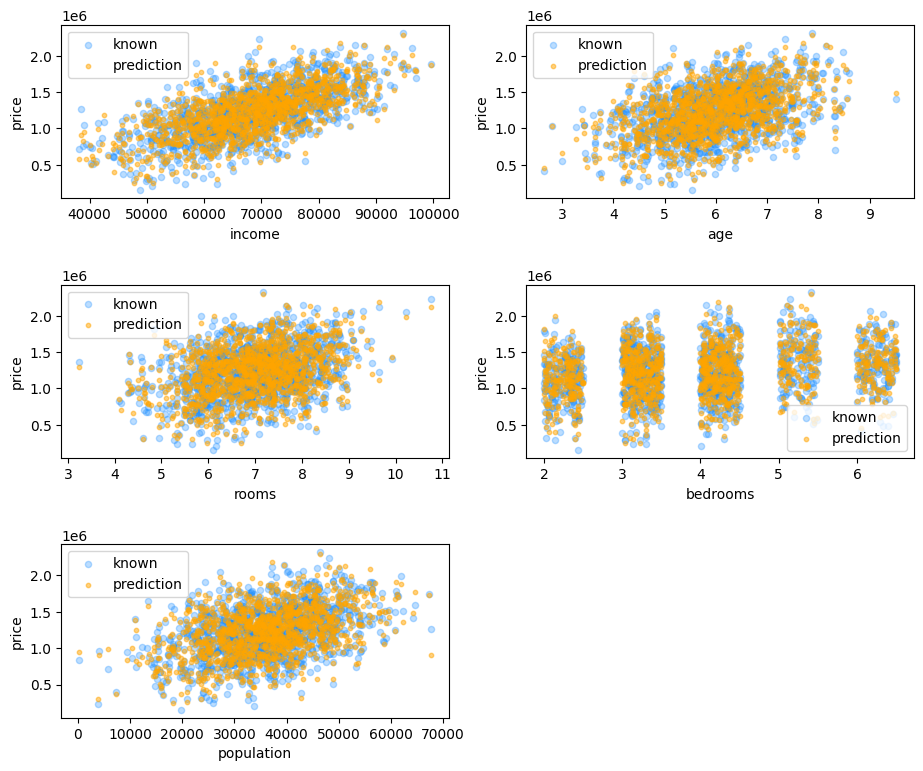

In [52]:
plot_features(feature_list=five_features, feature_df=features_test, target=target_test, predict=predict)

### Apply it to an individual house to see how it repoduces the actual target value.

In [53]:
housing.loc[[0]]

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.0029,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


**Using our ML model**

In [55]:
price = model.predict(X=housing.loc[[0], five_features])

f'{price[0]:0.3e}'

'1.496e+06'

**Alternatively, using the equation for a line:**

y = (m1 * x1) + (m2 * x2) + (m3 * x3) + (m4 * x4) + (m5 * x5) + (b)

In [56]:
print(f'''  y = ({model.coef_[0]:0.2e} * {float(housing["income"].iloc[0]):0.2e})
    + ({model.coef_[1]:0.2e} * {float(housing["age"].iloc[0]):0.2e})
    + ({model.coef_[2]:0.2e} * {float(housing["rooms"].iloc[0]):0.2e})
    + ({model.coef_[3]:0.2e} * {float(housing["bedrooms"].iloc[0]):0.2e})
    + ({model.coef_[4]:0.2e} * {float(housing["population"].iloc[0]):0.2e})
    + {model.intercept_:0.2e}''')

  y = (2.16e+01 * 7.92e+04)
    + (1.66e+05 * 6.00e+00)
    + (1.19e+05 * 6.73e+00)
    + (1.48e+03 * 3.09e+00)
    + (1.52e+01 * 4.02e+04)
    + -2.63e+06


In [57]:
price = (model.coef_[0] * float(housing["income"].iloc[0]))     \
      + (model.coef_[1] * float(housing["age"].iloc[0]))        \
      + (model.coef_[2] * float(housing["rooms"].iloc[0]))      \
      + (model.coef_[3] * float(housing["bedrooms"].iloc[0]))   \
      + (model.coef_[4] * float(housing["population"].iloc[0])) \
      + model.intercept_

f'{price:0.3e}'

'1.496e+06'

=> Good agreement between the model predicted value and the target $ 1.506e+06 value.

### How do you run the model for a new house?

1. Create a new dataframe that provides the house's features
2. Use predict to generate a predicted value

In [58]:
new_house_features = pd.DataFrame(np.array([ [8.00e4, 6.5, 7.0, 4.0, 40.0e3 ] ]),
                                  columns=five_features)

display(new_house_features)

,income,age,rooms,bedrooms,population
0,80000.0,6.5,7.0,4.0,40000.0


In [59]:
new_house_price = model.predict(X=new_house_features)
new_house_price

array([1625986.60825998])

In [60]:
display(new_house_features)

print(f'The cost of the above house is predicted to be: ${float(new_house_price[0]):0.3e}.')

,income,age,rooms,bedrooms,population
0,80000.0,6.5,7.0,4.0,40000.0


The cost of the above house is predicted to be: $1.626e+06.


# References

[1] Dr. Karl Kirschner , Github link: https://github.com/karlkirschner/Scientific_Programming_Course.git, **(Last access: 12.01.2026)** 